In [1]:
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')


In [2]:
%store -r recent_sales

In [3]:
recent_sales.shape

(33508, 10)

In [4]:
recent_sales.head()

,Address,Suburb,Beds,Baths,Carpark,Type,Size,By,Price,Date
2,2 Lillyana St,Schofields Nsw 2762,4.0,3.0,1.0,House,500.2,Private Sale,1065000,2022-02-15
1,33/24 Walker St,Rhodes Nsw 2138,2.0,2.0,1.0,Apartment,0.0,Private Sale,801000,2022-02-15
4,7/1 Fewings St,Clovelly Nsw 2031,2.0,2.0,1.0,Townhouse,0.0,Auction,1520000,2022-02-15
5,127/25 Best St,Lane Cove Nsw 2066,3.0,1.0,1.0,Apartment,0.0,Private Sale,1450000,2022-02-15
0,4/97 The Blvde,Wiley Park Nsw 2195,2.0,1.0,1.0,Apartment,0.0,Private Sale,462000,2022-02-15


In [5]:
recent_sales['Price'] = recent_sales['Price'].astype(int)

## Budget, Bedrooms, Bathrooms, Time Window

In [6]:
budget = 1.0*1000000
beds = 2
baths = 2
d_date = date.today() + relativedelta(months=-12) # within 6 months
d_date = d_date.strftime("%m/%d/%y")

xlim_min = 600000
xlim_max = 1100000
ylim_max = 20


In [7]:
properties = recent_sales[(recent_sales["Price"]<=budget) & (recent_sales["Beds"]>=beds) & (recent_sales["Baths"]>=baths) & (recent_sales["Date"]>=d_date)]

## Target Suburbs

In [8]:
places = [
    'Ryde Nsw 2112',
    'West Ryde Nsw 2114',
    'North Ryde',
    'Macquarie Park',
    'Eastwood',
    'Meadowbank',
    'Rhodes Nsw 2138',
    'Castle Hill Nsw',
    'Waitara',
    'Hornsby',
    'Chatswood',
    'Beecroft',
    'Pymble',
    
    
    
    
]


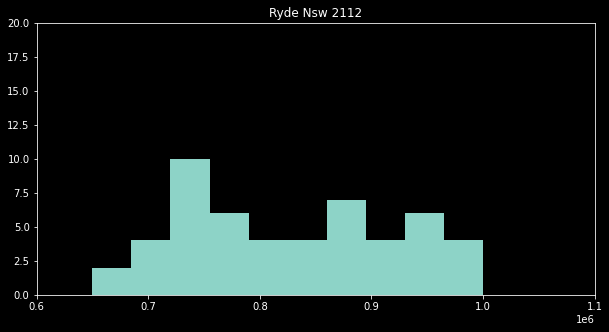

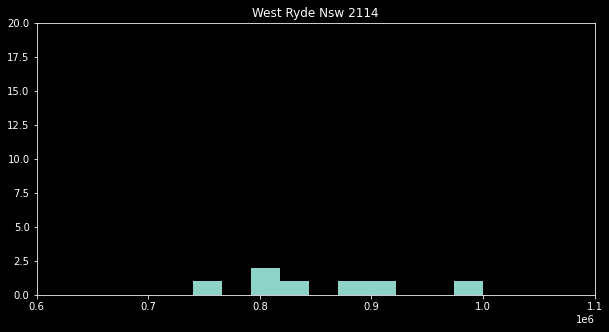

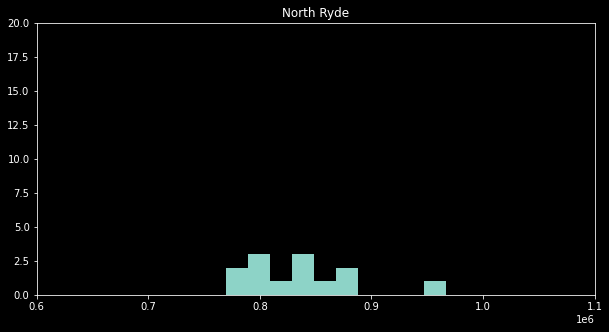

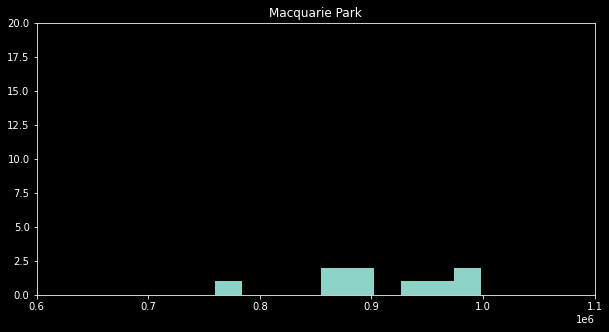

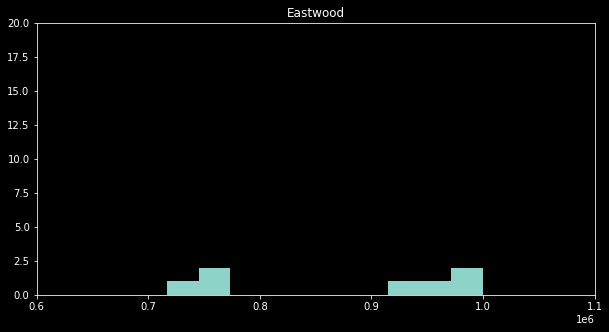

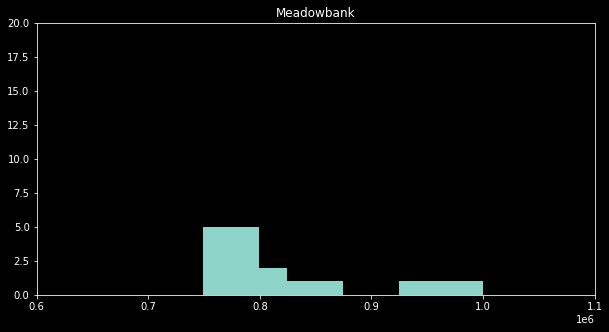

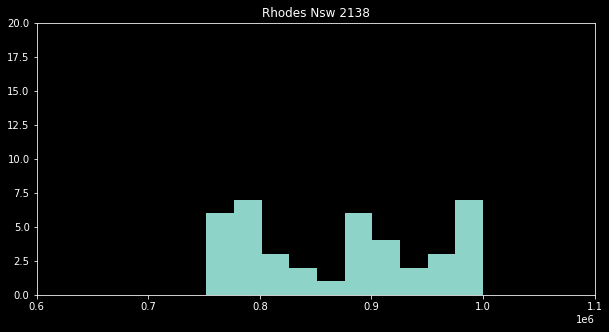

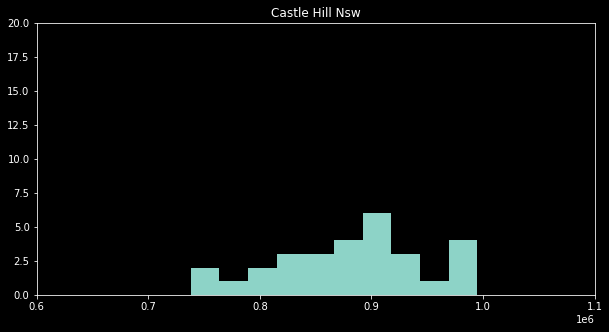

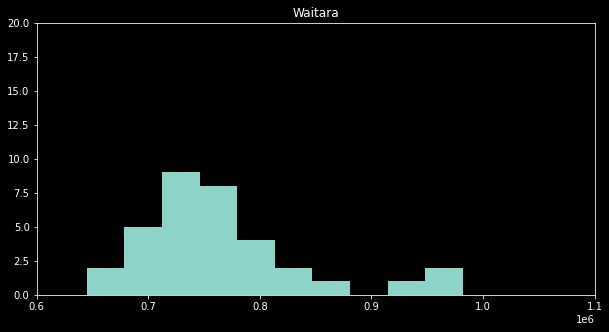

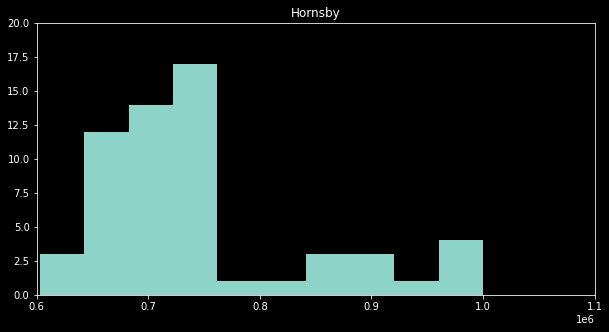

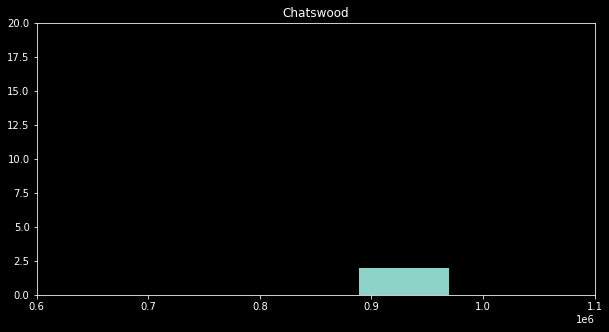

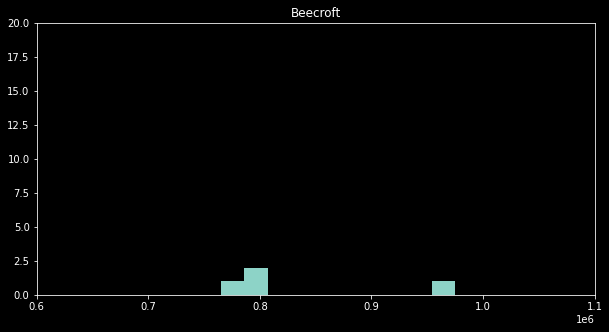

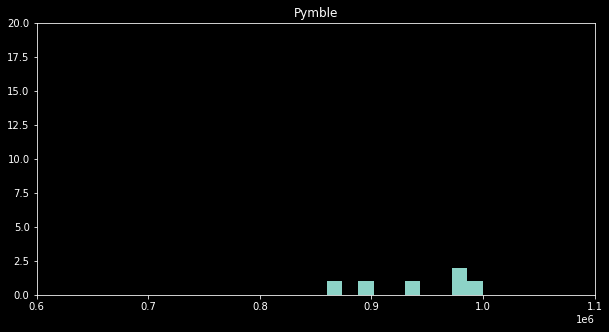

In [9]:
for place in places:
    # print(place,":")
    result = properties[properties['Suburb'].str.contains(place)]
    # display(place)
    plt.figure(figsize=(10,5))
    plt.xlim(xlim_min, xlim_max)
    plt.ylim(0, ylim_max)
    plt.hist(result['Price'])
    plt.title(place)